<a href="https://colab.research.google.com/github/ola338/Machine-learning-projects/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import plotly.express as px

In [ ]:
!wget http://home.agh.edu.pl/~czech/vis-datasets/misc/nyt-frame.csv
!wget http://home.agh.edu.pl/~czech/vis-datasets/misc/04cars-data.csv

In [ ]:
df = pd.read_csv('./nyt-frame.csv', header = 0)
data = df.iloc[:,9:]
array = data.values

In [ ]:
df

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,4,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,5,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,...,0.000000,0.0,0.048151,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,music,0.006929,0.0,0.0,0.000000,0.000000,0.0,0.005600,0.0,...,0.000000,0.0,0.024425,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
98,99,music,0.111882,0.0,0.0,0.000000,0.000000,0.0,0.003716,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
99,100,music,0.006550,0.0,0.0,0.000000,0.000000,0.0,0.009301,0.0,...,0.000000,0.0,0.029686,0.015659,0.0,0.026605,0.0,0.0,0.0,0.0
100,101,music,0.009497,0.0,0.0,0.000000,0.040362,0.0,0.003070,0.0,...,0.000000,0.0,0.066953,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['jewelry' 'beat' 'germany' 'letter' 'nearby' 'scott' 'bushy' 'menacing'
 'cause' 'barefoot' 'revenue' 'trust' 'tully' 'legs' 'photographers'
 'travelers' 'calvin' 'leader' 'mezzanine' 'discuss']


In [ ]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(array)

In [ ]:
PC1 = pca.components_[0]
words_index_PC1 = np.argsort(PC1)
values_PC1 = np.sort(PC1)

In [ ]:
words_h_PC1 = data.columns[words_index_PC1[-15:]]
result_h_PC1 = pd.DataFrame(values_PC1[-15:].T, index=words_h_PC1.T, columns=['PC1-highest values'])
print(result_h_PC1)

           PC1-highest values
me                   0.063793
he                   0.065310
mrs                  0.065621
im                   0.068574
paintings            0.069885
process              0.071196
painting             0.087887
my                   0.094325
cooper               0.103009
mother               0.106872
said                 0.133606
i                    0.150283
ms                   0.202113
her                  0.245293
she                  0.261274


największe wartości pierwszego komponentu wiodącego odpowiadają słowom: she, her, ms, i ,said

In [ ]:
words_s_PC1 = data.columns[words_index_PC1[:15]]
result_s_PC1 = pd.DataFrame(values_PC1[:15].T, index=words_s_PC1.T, columns=['PC1-smallest values'])
print(result_s_PC1)

           PC1-smallest values
music                -0.112116
trio                 -0.087807
theater              -0.074046
orchestra            -0.069269
composers            -0.058591
opera                -0.055554
theaters             -0.051178
m                    -0.049025
program              -0.049001
players              -0.048819
festival             -0.048123
east                 -0.047941
y                    -0.047912
jersey               -0.046032
symphony             -0.044931


Najmiejsze wartości pierwszego komponentu wiodącego odpowiadają słowom: music, trio, theater, orchestra, composers

In [ ]:
PC2 = pca.components_[1]
words_index_PC2 = np.argsort(PC2)
values_PC2 = np.sort(PC2)

In [ ]:
words_h_PC2 = data.columns[words_index_PC2[-15:]]
result_h_PC2 = pd.DataFrame(values_PC2[-15:].T, index=words_h_PC2.T, columns=['PC2-highest values'])
print(result_h_PC2)

            PC2-highest values
vocal                 0.067588
orchestra             0.067603
songs                 0.069232
musical               0.070708
music                 0.072345
festival              0.073009
production            0.074158
sang                  0.074653
hour                  0.080759
i                     0.081202
ms                    0.124470
opera                 0.129926
theater               0.162391
she                   0.213074
her                   0.220785


Największe wartości drugiego komponentu wiodącego odpowiadają słowom: her, she, theater, opera, ms.
Słowa she i her także miały największe wartości dla pierwszego komponentu. Z kolei theater i opera dla drugiego komponentu mają duże wartości, a dla pierwszego komponentu miały niskie

In [ ]:
words_s_PC2 = data.columns[words_index_PC2[:15]]
result_s_PC2 = pd.DataFrame(values_PC2[:15].T, index=words_s_PC2.T, columns=['PC2-smallest values'])
print(result_s_PC2)

            PC2-smallest values
art                   -0.154317
museum                -0.120899
images                -0.095227
artists               -0.092635
donations             -0.077658
museums               -0.075395
painting              -0.074020
tax                   -0.072269
paintings             -0.065643
sculpture             -0.060353
gallery               -0.055159
sculptures            -0.051479
painted               -0.050138
white                 -0.049667
service               -0.046664


Najmiejsze wartości drugiego komponentu wiodącego odpowiadają słowom: art, museum, images, artists, donations. Słowa o najniższych wartościach są różne dla komponentów pierwszego i drugiego.

In [ ]:
reds = df['class.labels'] == 'art'
blues = df['class.labels'] == 'music'

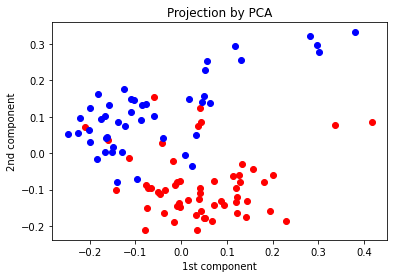

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

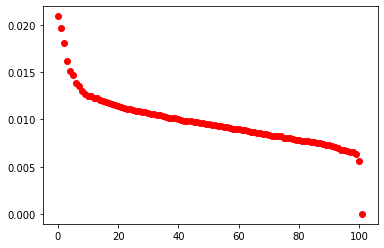

Po wykonaniu projekcji na pierwsze 10 komponentów wiodących  zostaje zachowana 0.15773478029003496 wariancji


In [ ]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(f"Po wykonaniu projekcji na pierwsze 10 komponentów wiodących  zostaje zachowana {sum(variance_ratio[0:10])} wariancji")

### Zad. 2

In [ ]:
df = pd.read_csv('./04cars-data.csv', header = 0)

In [ ]:
data = df.iloc[:, -11:]
data

,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...
382,37730,35542,2.9,6,208,20,28,3576,110,190,72
383,45210,42573,2.9,6,268,19,26,3653,110,190,72
384,26135,24641,1.9,4,170,22,29,2822,101,180,68
385,35145,33112,2.5,5,208,20,27,3823,109,186,73


In [ ]:
data.shape

(387, 11)

In [ ]:
# normalizacja, aby średnia arytmetyczne wynosiła 0, a wariancja 1
scaler = preprocessing.StandardScaler().fit(data)
norm_data = scaler.transform(data)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(norm_data)

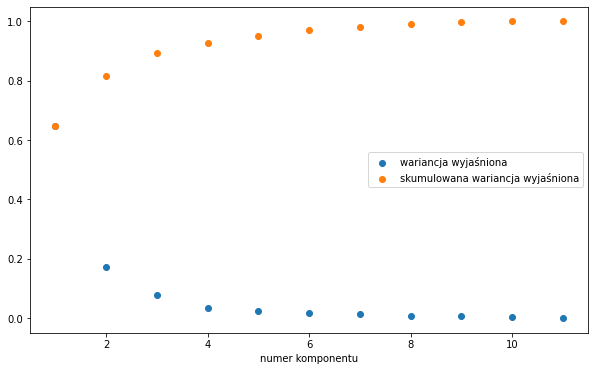

In [ ]:
n_comp = norm_data.shape[1]
plt.figure(figsize=(10,6))
plt.scatter(range(1, n_comp+1), pca.explained_variance_ratio_, label='wariancja wyjaśniona')
plt.scatter(range(1, n_comp+1),np.cumsum(pca.explained_variance_ratio_), label='skumulowana wariancja wyjaśniona')
plt.legend()
plt.xlabel('numer komponentu')
plt.show()

In [ ]:
print(f"Wariancja zachowana przy redukcji wymiarowości do 2: {np.sum(pca.explained_variance_ratio_[:2])}")
print(f"Wariancja zachowana przy redukcji wymiarowości do 3: {np.sum(pca.explained_variance_ratio_[:3])}")

Wariancja zachowana przy redukcji wymiarowości do 2: 0.8171421089701892
Wariancja zachowana przy redukcji wymiarowości do 3: 0.8943901348942341


In [ ]:
attributes = data.columns
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print('Attribute, PC1, PC2')
for i in range(0,pc1.shape[0]):
    print(attributes[i] + ':' + repr(pc1[i]) + ':' + repr(pc2[i]))

Attribute, PC1, PC2
Retail Price:-0.26375044344403425:0.46850869750253876
Dealer Cost:-0.26231863875309525:0.4701465851382257
Engine Size (l):-0.34708049202520086:-0.01534718646371358
Cyl:-0.3341887576286371:0.07803201087501868
HP:-0.31860225848402923:0.292213476139182
City MPG:0.3104817267323128:-0.003365935761659125
Hwy MPG:0.30658863858044433:-0.010964460145348687
Weight:-0.3363293669404879:-0.1674635715478704
Wheel Base:-0.26621003357105416:-0.4181771069592041
Len:-0.2567901876706822:-0.40841138066875465
Width:-0.29605459141706103:-0.312891350162507


elementy o wartości bliskiej zeru mają bardzo mały wpływ na główną składową

In [ ]:
index = np.argsort(pc1)
car_features_h = list(data.columns[index[-3:]])
car_features_h.reverse()
car_features_l = list(data.columns[index[:3]])
car_features_l.reverse()
print(f" Największe elementy pierwszego komponentu wiodącego: {car_features_h}")
print(f" Najmniejsze elementy pierwszego komponentu wiodącego: {car_features_l}")

 Największe elementy pierwszego komponentu wiodącego: ['City MPG', 'Hwy MPG', 'Len']
 Najmniejsze elementy pierwszego komponentu wiodącego: ['Cyl', 'Weight', 'Engine Size (l)']


In [ ]:
index = np.argsort(pc2)
car_features_h = list(data.columns[index[-3:]])
car_features_h.reverse()
car_features_l = list(data.columns[index[:3]])
car_features_l.reverse()
print(f" Największe elementy  drugiego komponentu wiodącego: {car_features_h}")
print(f" Najmniejsze elementy  drugiego komponentu wiodącego: {car_features_l}")

 Największe elementy  drugiego komponentu wiodącego: ['Dealer Cost', 'Retail Price', 'HP']
 Najmniejsze elementy  drugiego komponentu wiodącego: ['Width', 'Len', 'Wheel Base']


In [ ]:
features = pd.DataFrame(X_pca)
features.columns = [f'PC{i+1}' for i in range(11)]
px.scatter(features, x=features.columns[0], y=features.columns[1])

In [ ]:
fig = px.scatter_3d(features, x=features.columns[0], y=features.columns[1], z=features.columns[2])
fig.update_traces(marker=dict(size=3))
fig.show()

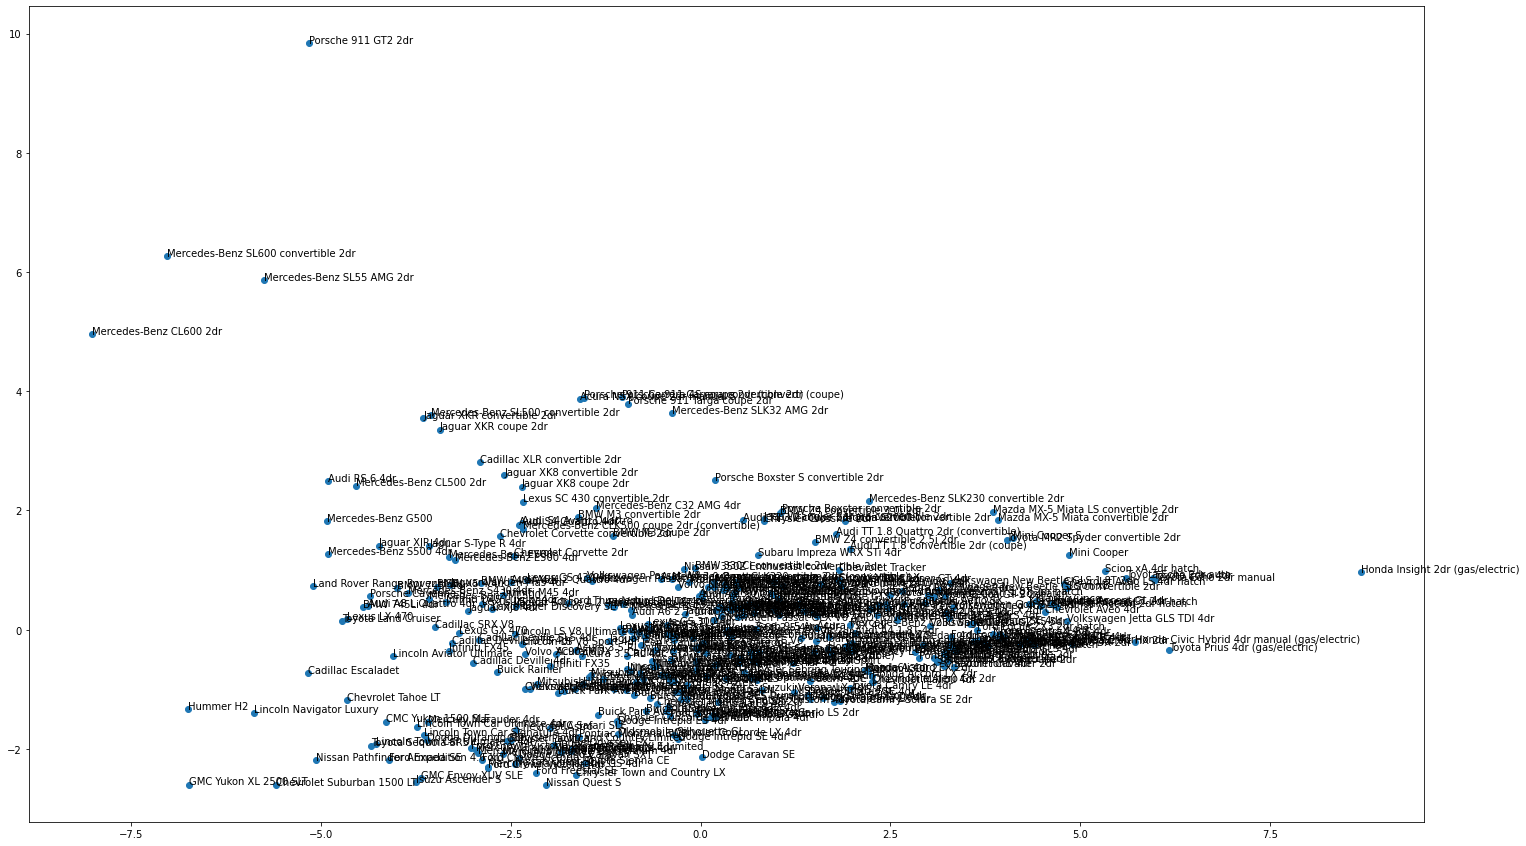

In [ ]:
fig, ax = plt.subplots()
ax.scatter(features.values[:,0], features.values[:,1])
fig.set_size_inches(25,15)
for i, names in enumerate(df['Vehicle Name'].values):
    ax.annotate(names, (features.values[i,0], features.values[i,1]))

Porsche, Mercedes-Benz oraz Honda mają wartości odstające od pozostałych marek samochodów. U góry wykresu występują drogie marki samochodów, po prawej stronie wykresu samochodu zużywające mało paliwa, natomiast w dolnej części mające dużą pojemność silnika.

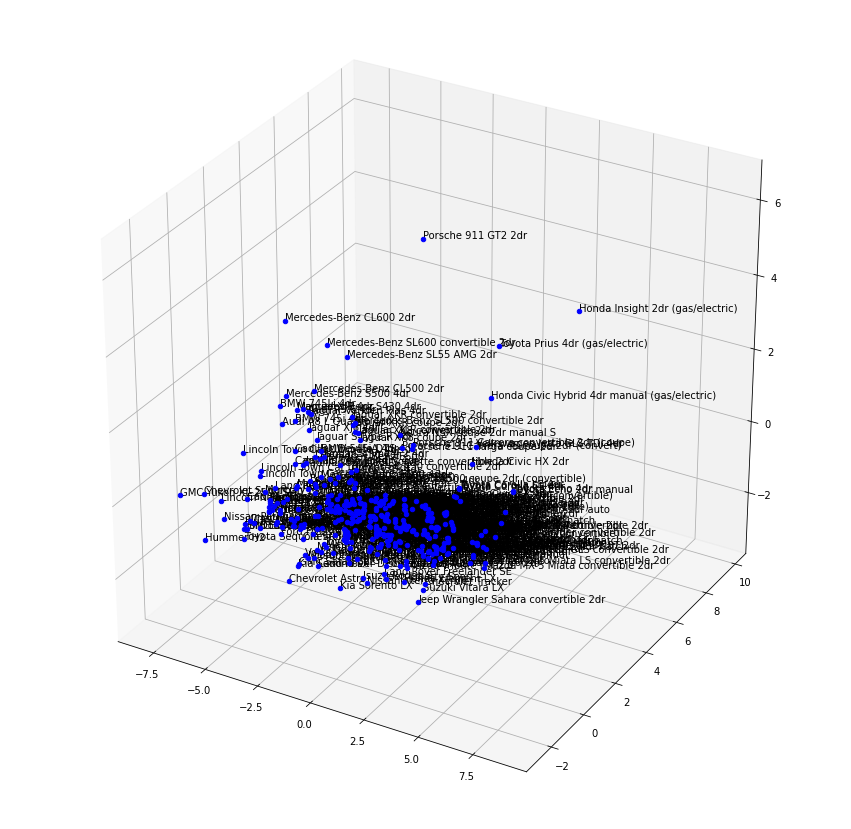

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_size_inches(15,15)
for i in range(len(features.values)):
    j = df['Vehicle Name'].loc[i]
    ax.scatter(features.values[i,0], features.values[i,1], features.values[i,2], color='b') 
    ax.text(features.values[i,0], features.values[i,1], features.values[i,2], '%s' %j, zorder=1) 

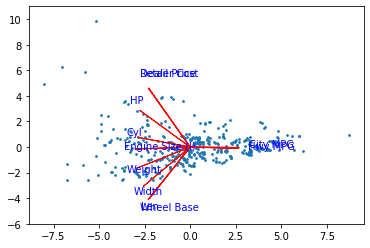

In [ ]:
x = X_pca[:,0]
y = X_pca[:,1]
pc1 = pca.components_[0]
pc2 = pca.components_[1]
data = pd.DataFrame(norm_data,columns=df.columns[-11:])
for i, _ in enumerate(pc1):
    plt.arrow(0, 0, pc1[i]*max(x), pc2[i]*max(y), color='r', lw=1, head_length=.05, head_width=.04, length_includes_head=True)
    plt.text(pc1[i]*max(x)*1.2, pc2[i]*max(y)*1.2, list(data.columns.values)[i], color='b')

plt.scatter(x, y, s=3)
plt.ylim((-6, 11))
plt.show()

Strzałki wskazują kierunek zmiennych